In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [2]:
train_data = train_data.set_index("PassengerId")
test_data = test_data.set_index("PassengerId")

In [3]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Cleaning Data and Feature Engineering

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_data_features = train_data.drop('Survived',axis=1).copy()

In [7]:
train_data_features.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

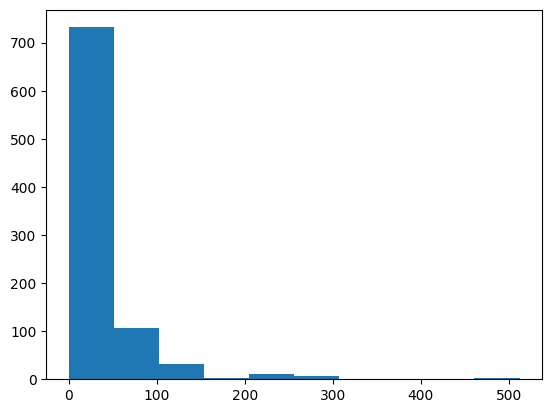

In [8]:
plt.hist(train_data_features['Fare'])

<BarContainer object of 2 artists>

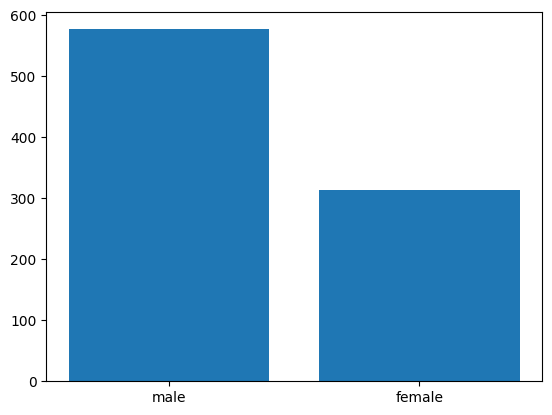

In [9]:
categories = train_data_features['Sex'].unique()
values = train_data_features['Sex'].value_counts()
plt.bar(categories,values)

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

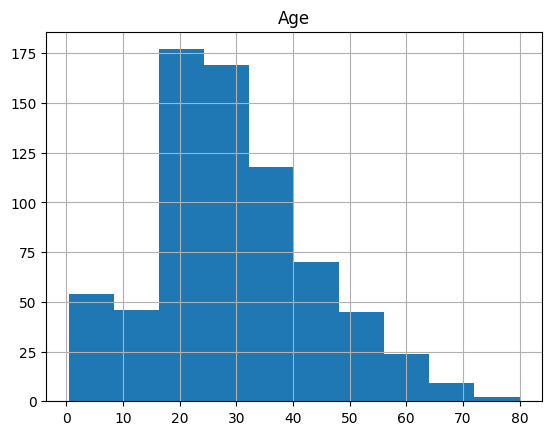

In [10]:
train_data_features.hist('Age')

### Making Pipelines

In [11]:
def feature_engineering(data):
    data['Family_size'] = data['Parch']+data['SibSp']+1
    data['Fare_per_person'] = data['Fare']/data['Family_size']
    data['IsAlone'] = (data['Family_size'] == 1).astype(int)
    def age_cat(row):
        if row<18:
            return 'Child'
        elif row>18 and row<30:
            return 'Young Adult'
        elif row>30 and row<60:
            return 'Adult'
        else:
            return 'Old'
    data['Age_cat'] = data['Age'].apply(age_cat)


    return data

In [12]:
y_train = train_data['Survived']

In [13]:
train_data_features = train_data.drop('Survived',axis=1).copy()

In [14]:
train_data_eng = feature_engineering(train_data_features)

In [15]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [16]:
cat_pipeline_ord = Pipeline([
                        ("ordinal_encoder",OrdinalEncoder()),
                        ("imputer",SimpleImputer(strategy='most_frequent')),
                        ("scaler", StandardScaler()),])
cat_pipeline_one = Pipeline([("one_hot",OneHotEncoder(sparse_output=False)),
                        ("imputer",SimpleImputer(strategy='most_frequent')),
                        ("scaler", StandardScaler())])
num_pipeline = Pipeline([
                        ("imputer",SimpleImputer(strategy='median')),
                        ("scaler",StandardScaler())
])

In [17]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Age", "SibSp", "Parch", "Fare","Family_size","Fare_per_person","IsAlone"]
cat_attribs_one = ["Pclass", "Sex", "Embarked"]
cat_attribs_ord = ["Age_cat"]

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat_ord", cat_pipeline_ord, cat_attribs_ord),
        ("cat_one",cat_pipeline_one,cat_attribs_one)
    ])

In [18]:
X_train = preprocess_pipeline.fit_transform(train_data_eng)

### Training model from scratch

In [19]:
def add_bias(X):
    bias = np.ones((X.shape[0], 1))
    return np.concatenate((bias, X), axis=1)

In [20]:
def sigmoid(z):
    z = np.clip(z, -500, 500)
    return 1/(1+np.exp(-z))

$$ (-1/m) \sum [y log(p) + (1-y)log(1-p)]$$

In [21]:
def cross_entropy_loss(y_test,y_pred):
    m = y_test.shape[0]
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  #limits the value of y_pred to prevent log(0)
    cost = (-1/m) * (y_test * np.log(y_pred) + (1 - y_test) * np.log(1 - y_pred))
    return cost

this calculates the gradient
$$ Gradient: ∂J/∂θ = (1/m) * X^T  (y_p - y) $$
$$ ∂J/∂b = (1/m) \sum (y_p-y)$$

In [22]:
def gradient(X,y_test,y_pred):
    m = X.shape[0]
    error = y_pred-y_test
    dw = (1/m)*np.dot(X.T,error)
    db = (1/m) * np.sum(error)
    return dw,db

In [23]:
def gradient_descent(X,y,learning_rate=0.001,max_iter = 20000):
    no_of_features = X.shape[1]
    weights = np.random.normal(0, 0.01, no_of_features) #gives values forming a guassian distribution, most values near 0 hence sigmoid will tend be 0.5
    bias = 0
    cost_history = []
    for i in range(max_iter):
        z = np.dot(X,weights)+bias
        y_pred = sigmoid(z)
        cost = cross_entropy_loss(y, y_pred)
        cost_history.append(cost)
        dw,db = gradient(X,y,y_pred)
        weights -= learning_rate*dw
        bias -= learning_rate*db
    return weights,bias,cost_history

In [24]:
def predict(X,weights,bias,threshold = 0.5):
    z = np.dot(X,weights) + bias
    prob = sigmoid(z)
    return (prob>=threshold).astype(int)

In [25]:
w,b,cost_history = gradient_descent(X_train,y_train)

In [26]:
X_test_eng = feature_engineering(test_data)

In [27]:
X_test = preprocess_pipeline.transform(X_test_eng)   #donot fit again in test data

In [28]:
y_pred = predict(X_train,w,b)   #predicted on the training set itself

In [30]:
from sklearn.metrics import mean_squared_error,accuracy_score

In [31]:
mean_squared_error(y_pred,y_train)

0.19528619528619529

In [32]:
accuracy_score(y_pred,y_train)

0.8047138047138047

In [33]:
y_pred_test = predict(X_test,w,b)   #predicting on the given test dataset